# Cleaning NGA and WMS data

The NGA and WMS was send by Ramusiya Fhedzisani, Scientific Manager: Groundwater Resources Assessment & Monitoring. Department of Water and Sanitation South Africa. The data needed to be transformed into a format suitable for upload to RIMS database.

## Loading in the libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import glob
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in the data

File formats received: xls, xlsx, csv and text files. Structurally, most of files  followed the format of RIMS i.e. samples as rows and features as columns. All similarly formatted files were concatenated and then cleaned, while other files required additional formatting and then concatenated into a single file. 

In [2]:
print (os.getcwd())
os.chdir("C:\\Users\\ebrahiem.a\\Desktop\\Manipulated NGA\\NGA and WMS databases")

C:\Users\ebrahiem.a\Desktop\Manipulated NGA\NGA and WMS databases


In [3]:
def find_csv_filenames(path_to_dir, suffix = ".csv" ):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

def find_xlsx_filenames(path_to_dir, suffix = ".xlsx" ):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

def find_xls_filenames(path_to_dir, suffix = ".xls" ):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

def find_txt_filenames(path_to_dir, suffix = ".TXT" ):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

In [4]:
filenames1 = find_csv_filenames("C:\\Users\\ebrahiem.a\\Desktop\\Manipulated NGA\\NGA and WMS databases")
filenames2 = find_xlsx_filenames("C:\\Users\\ebrahiem.a\\Desktop\\Manipulated NGA\\NGA and WMS databases")
filenames3 = find_xls_filenames("C:\\Users\\ebrahiem.a\\Desktop\\Manipulated NGA\\NGA and WMS databases")
filenames4 = find_txt_filenames("C:\\Users\\ebrahiem.a\\Desktop\\Manipulated NGA\\NGA and WMS databases")

for name1 in filenames1:
  print (name1)
for name2 in filenames2:
  print (name2)
for name3 in filenames3:
  print (name3)
for name4 in filenames4:
  print (name4)

A1N0001_WaterLevels.csv
A1N0002_WaterLevels.csv
A1N0003_WaterLevels.csv
A3N0015_WaterLevels.csv
A3N0513_WaterLevels.csv
A3N0514_WaterLevels.csv
A3N0516_WaterLevels.csv
A3N0519_WaterLevels.csv
A3N0521_WaterLevels.csv
D4N1468_WaterLevels.csv
D4N1658_WaterLevels.csv
D4N1666_WaterLevels.csv
D4N2515_WaterLevels.csv
D4N2516_WaterLevels.csv
D4N2517_WaterLevels.csv
Ramotswa data 1 20190904.csv
Ramotswa data 2 20190904.csv
Ramotswa variables inventory 20190904.csv
SITE_INFORA10A.csv
A1H001 Upper Eye Dinokana.xlsx
A1H002 Lower Eye Dinokana.xlsx
A1H003 Upper Eye Tweefontein.xlsx
A1H004 Lower Eye Tweefontein.xlsx
A1H005 Skilpad Eye.xlsx
Quality Code Description.xlsx
Ramotswa study area plus 10km.xlsx
Quality codes.xls
Ramotswa data 1 20190904_CSV.TXT
Ramotswa data 2 20190904_CSV.TXT
Ramotswa variables inventory 20190904_CSV.TXT


## Reading in water levels

In [5]:
# list of csv files in folder 

files = ['A1N0001_WaterLevels.csv', 'A1N0002_WaterLevels.csv', 'A1N0003_WaterLevels.csv', 'A3N0015_WaterLevels.csv',
         'A3N0513_WaterLevels.csv', 'A3N0514_WaterLevels.csv', 'A3N0516_WaterLevels.csv', 'A3N0519_WaterLevels.csv',
         'A3N0521_WaterLevels.csv', 'D4N1468_WaterLevels.csv', 'D4N1658_WaterLevels.csv', 'D4N1666_WaterLevels.csv',
         'D4N2515_WaterLevels.csv', 'D4N2516_WaterLevels.csv', 'D4N2517_WaterLevels.csv']

In [6]:
# create emtpy dataframe for water levels

water_levels = pd.DataFrame()

# append each csv file to water level dataframe

for f in files:
    df = pd.read_csv(f, parse_dates=True, date_parser = True)
    #df = pd.read_csv(f, header = 0)
    df.rename(columns = lambda x: x.strip().lower(), inplace = True)
    water_levels = water_levels.append(df, ignore_index = True, sort = False)
    #water_levels = water_levels.drop(water_levels.index[[0]])

water_levels.head(2)

,station,date,time,water_level,quality,datatrans,comment,unnamed: 7
0,A1N0001,19770121,00:00,-27.39,26,7,...,NaN
1,A1N0001,19770315,12:00,-27.58,26,7,...,NaN


### Assessing water levels

In [7]:
water_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
station        1085 non-null object
date           1085 non-null int64
time           1085 non-null object
water_level    1085 non-null float64
quality        1085 non-null int64
datatrans      1085 non-null int64
comment        1085 non-null object
unnamed: 7     3 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 67.9+ KB


In [8]:
# List unique stations and number of unique stations
print ('\n List of unique stations: \n {}'.format(water_levels ['station'].unique()))
print ('\n Number of unique stations: \n {}'.format(water_levels ['station'].nunique()))


 List of unique stations: 
 ['A1N0001 ' 'A1N0002 ' 'A1N0003 ' 'A3N0015 ' 'A3N0513 ' 'A3N0514 '
 'A3N0516 ' 'A3N0519 ' 'A3N0521 ' 'D4N1468 ' 'D4N1658 ' 'D4N1666 '
 'D4N2515 ' 'D4N2516 ' 'D4N2517 ']

 Number of unique stations: 
 15


In [9]:
# data entries per station or bh_id
water_levels.station.value_counts()

A3N0015     293
A1N0001     275
A1N0003     217
D4N1468      92
A1N0002      45
D4N2517      34
D4N2516      26
A3N0516      24
A3N0514      19
D4N2515      18
A3N0513      14
A3N0521      12
D4N1658       8
A3N0519       6
D4N1666       2
Name: station, dtype: int64

In [10]:
# distinct values of comment column
water_levels ['comment'].unique()

array(['                                                                                                    ',
       '03/03/2011- dry', '09/06/2010- filled with bees',
       '01/12/2016 Dry                                                                                      ',
       'Dry from 25/11/2010 till 10/2013.                                                                   ',
       'DRY                                                                                                 ',
       'dry                                                                                                 ',
       'dry',
       '25/11/2010 Bees                                                                                     ',
       '26/06/2014 Bees                                                                                     ',
       '12/11/2015 No entry                                                                                 ',
       'Created by HYCREATE. DEFAULT 08:

In [11]:
# distinct values of unnamed: 7 column
water_levels ['unnamed: 7'].unique()

array([nan,
       'collapsed at about 4m.                                                              ',
       ' assumed dry. 06/08/2011 till 26/06/2014 - no acces                    ',
       ' collapsed                                                                                      '],
      dtype=object)

In [12]:
# distinct values of datatrans column
water_levels ['datatrans'].unique()

array([7], dtype=int64)

In [13]:
# distinct values of quality columns
water_levels ['quality'].unique()

array([26, 93,  1], dtype=int64)

In [14]:
# formatting of the date column
print (water_levels ['date'].unique()[:5])

[19770121 19770315 19770414 19770525 19770626]


### Cleaning water levels

#### Issues listed with water levels 

- strip spaces from station names using the strip function.
- Quality and datatrans are codes, describing the condition. Should we add the code description? The code files are listed in 'Quality Code Description.xlsx' and 'Quality codes.xls'. Use map function to convert code number to description of code. 
- Comments and unnamed: 7, are comments and can be merged. Concatenate columns by adding (+) string values. Drop unnamed: 7 column
- Date column not in correct format, current date entry e.g. 19780529. Use to datatime module and convert date to yyy/mm/dd.
- change water level to swl as per RIMS
- water levels are given with a negative, mbgl? RIMS swl meters below surface? 
- Get latitudes and longitudes
- Provide source and contact details?
- Rename columns according to rims. For example Station name to borehole id (bh_id) as in RIMS
- Drop unecessary columns: water_level, datatrans, quality

In [15]:
water_levels_cleaning = water_levels.copy()

In [16]:
# Removed spaces at the end of station names
print ('\n Stations names before being stripped: \n {}'.format(water_levels ['station'].unique()))
water_levels_cleaning ['station'] = water_levels_cleaning ['station'].str.replace(' ', '')
print ('\n Stations names after being stripped: \n {}'.format(water_levels_cleaning ['station'].unique()))


 Stations names before being stripped: 
 ['A1N0001 ' 'A1N0002 ' 'A1N0003 ' 'A3N0015 ' 'A3N0513 ' 'A3N0514 '
 'A3N0516 ' 'A3N0519 ' 'A3N0521 ' 'D4N1468 ' 'D4N1658 ' 'D4N1666 '
 'D4N2515 ' 'D4N2516 ' 'D4N2517 ']

 Stations names after being stripped: 
 ['A1N0001' 'A1N0002' 'A1N0003' 'A3N0015' 'A3N0513' 'A3N0514' 'A3N0516'
 'A3N0519' 'A3N0521' 'D4N1468' 'D4N1658' 'D4N1666' 'D4N2515' 'D4N2516'
 'D4N2517']


In [17]:
# convert quality code to descriptive quality code
print('\n quality column before: \n {}'.format(water_levels_cleaning ['quality'].unique()))
water_levels_cleaning ['quality'] = water_levels_cleaning ['quality'].map({26: 'Gauge Plate Readings / dip level readings',
                                        93: 'Dry borehole', 1: 'Good continuous data'})
print('\n quality column after: \n {}'.format(water_levels_cleaning ['quality'].unique()))


 quality column before: 
 [26 93  1]

 quality column after: 
 ['Gauge Plate Readings / dip level readings' 'Dry borehole'
 'Good continuous data']


In [18]:
# convert datatrans code to descriptive datatrans code
print('\n datatrans column before: \n {}'.format(water_levels_cleaning ['datatrans'].unique()))
water_levels_cleaning ['datatrans'] = water_levels_cleaning ['datatrans'].map({7: 'Point data, no interpolaton - Monthly readings, hand measurements'})
print('\n datatrans column after: \n {}'.format(water_levels_cleaning ['datatrans'].unique()))


 datatrans column before: 
 [7]

 datatrans column after: 
 ['Point data, no interpolaton - Monthly readings, hand measurements']


In [19]:
# concatenate comment and unnamed: 7 columns
water_levels_cleaning = water_levels_cleaning.replace(np.nan, ' ')
water_levels_cleaning ['comment'] =  water_levels_cleaning ['comment'] +  water_levels_cleaning ['unnamed: 7']
water_levels_cleaning ['comment'].unique()

array(['                                                                                                     ',
       '03/03/2011- drycollapsed at about 4m.                                                              ',
       '09/06/2010- filled with bees assumed dry. 06/08/2011 till 26/06/2014 - no acces                    ',
       '01/12/2016 Dry                                                                                       ',
       'Dry from 25/11/2010 till 10/2013.                                                                    ',
       'DRY                                                                                                  ',
       'dry                                                                                                  ',
       'dry collapsed                                                                                      ',
       '25/11/2010 Bees                                                                                      '

In [20]:
# make string version of original column, call it 'col'
water_levels_cleaning['date'] = water_levels['date'].astype(str)

water_levels_cleaning['year'] = water_levels_cleaning['date'].str[0:4]
water_levels_cleaning['month'] = water_levels_cleaning['date'].str[4:6]
water_levels_cleaning['day'] = water_levels_cleaning['date'].str[6:]

water_levels_cleaning ['new_date'] =  water_levels_cleaning ['year'] + '-' + water_levels_cleaning ['month'] + '-' + water_levels_cleaning ['day'] 

water_levels_cleaning.head(1)

,station,date,time,water_level,quality,datatrans,comment,unnamed: 7,year,month,day,new_date
0,A1N0001,19770121,00:00,-27.39,Gauge Plate Readings / dip level readings,"Point data, no interpolaton - Monthly readings...",...,,1977,01,21,1977-01-21


In [21]:
# Insert file name
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A1N0001'), 'file_name'] = 'A1N0001_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A1N0002'), 'file_name'] = 'A1N0002_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A1N0003'), 'file_name'] = 'A1N0003_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A3N0015'), 'file_name'] = 'A3N0015_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A3N0513'), 'file_name'] = 'A3N0513_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A3N0514'), 'file_name'] = 'A3N0514_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A3N0516'), 'file_name'] = 'A3N0516_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A3N0519'), 'file_name'] = 'A3N0519_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('A3N0521'), 'file_name'] = 'A3N0521_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('D4N1468'), 'file_name'] = 'D4N1468_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('D4N1658'), 'file_name'] = 'D4N1658_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('D4N1666'), 'file_name'] = 'D4N1666_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('D4N2515'), 'file_name'] = 'D4N2515_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('D4N2516'), 'file_name'] = 'D4N2516_WaterLevels.csv'
water_levels_cleaning.loc[water_levels_cleaning['station'].str.contains('D4N2517'), 'file_name'] = 'D4N2517_WaterLevels.csv'

In [22]:
# change negative water level measurements to absolute water level
water_levels_cleaning['Water_level'] = water_levels_cleaning['water_level'].abs()

In [23]:
# Append to RIMS structure

water_levels_RIMS = pd.DataFrame({'bh_id':[],'country':[],'latitude':[],'longitude':[], 'swl_m':[], 'swl_date':[],
                                  'comment_waterlevel':[], 'dataowner' :[], 'contact_person': [],'email': [],
                                  'file_name': []})

water_levels_RIMS ['bh_id'] = water_levels_cleaning ['station']
water_levels_RIMS ['country'] = 'South Africa'
water_levels_RIMS ['swl_m'] = water_levels_cleaning ['Water_level']
water_levels_RIMS ['swl_date'] = water_levels_cleaning ['new_date']
water_levels_RIMS ['comment_waterlevel'] = water_levels_cleaning ['comment']
water_levels_RIMS ['file_name'] = water_levels_cleaning ['file_name']
water_levels_RIMS ['dataowner'] = "Department of Water and Sanitation South Africa"
water_levels_RIMS ['contact_person'] = "Ramusiya, Fhedzisani"
water_levels_RIMS ['email'] = "RamusiyaF@dws.gov.za" 

In [24]:
# Get coordinates of stations
fields = ['#STATION', 'LATITUDE', 'LONGITUDE']
coordinates = pd.read_csv ('SITE_INFORA10A.csv', usecols = fields)
coordinates.rename(columns = {'#STATION':'bh_id', 'LATITUDE':'latitude', 'LONGITUDE':'longitude'}, inplace = True)
coordinates.drop_duplicates(inplace = True)
coordinates.head()

,bh_id,latitude,longitude
0,A1N0001,-25.549722,25.927500
1,A1N0002,-25.550278,25.915278
2,A1N0003,-25.520583,25.919634
3,A3H012,-25.552222,25.997167
4,A3N0015,-25.614167,25.925556


In [25]:
print ('\n Unique bh_id: \n {}'.format(water_levels_RIMS ['bh_id'].unique()))
print ('\n Unique bh_id: \n {}'.format(coordinates ['bh_id'].unique()))


 Unique bh_id: 
 ['A1N0001' 'A1N0002' 'A1N0003' 'A3N0015' 'A3N0513' 'A3N0514' 'A3N0516'
 'A3N0519' 'A3N0521' 'D4N1468' 'D4N1658' 'D4N1666' 'D4N2515' 'D4N2516'
 'D4N2517']

 Unique bh_id: 
 ['A1N0001' 'A1N0002' 'A1N0003' 'A3H012' 'A3N0015' 'A3N0513' 'A3N0514'
 'A3N0516' 'A3N0519' 'A3N0521' 'D4N1468' 'D4N1658' 'D4N1666' 'D4N2515'
 'D4N2516' 'D4N2517']


In [26]:
pd.options.mode.chained_assignment = None

coord = coordinates[['bh_id','latitude','longitude']]
bhid_rims = list(water_levels_RIMS['bh_id'].unique())

coord_rims = coord [coord ['bh_id'].isin(bhid_rims) == True]
coord_rims.drop_duplicates(inplace = True)
coord_rims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 15
Data columns (total 3 columns):
bh_id        15 non-null object
latitude     15 non-null float64
longitude    15 non-null float64
dtypes: float64(2), object(1)
memory usage: 480.0+ bytes


In [27]:
RIMS_water_levels = water_levels_RIMS.merge(coord_rims, on = 'bh_id')
RIMS_water_levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 13 columns):
bh_id                 1085 non-null object
country               1085 non-null object
latitude_x            0 non-null float64
longitude_x           0 non-null float64
swl_m                 1085 non-null float64
swl_date              1085 non-null object
comment_waterlevel    1085 non-null object
dataowner             1085 non-null object
contact_person        1085 non-null object
email                 1085 non-null object
file_name             1085 non-null object
latitude_y            1085 non-null float64
longitude_y           1085 non-null float64
dtypes: float64(5), object(8)
memory usage: 118.7+ KB


In [28]:
RIMS_water_levels.drop(['latitude_x', 'longitude_x'], axis = 1, inplace = True)
RIMS_water_levels.rename(columns = {'latitude_y': 'latitude', 'longitude_y': 'longitude'}, inplace =True)
RIMS_water_levels.head(2)

,bh_id,country,swl_m,swl_date,comment_waterlevel,dataowner,contact_person,email,file_name,latitude,longitude
0,A1N0001,South Africa,27.39,1977-01-21,...,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1N0001_WaterLevels.csv,-25.549722,25.9275
1,A1N0001,South Africa,27.58,1977-03-15,...,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1N0001_WaterLevels.csv,-25.549722,25.9275


In [29]:
RIMS_water_levels.bh_id.value_counts()

A3N0015    293
A1N0001    275
A1N0003    217
D4N1468     92
A1N0002     45
D4N2517     34
D4N2516     26
A3N0516     24
A3N0514     19
D4N2515     18
A3N0513     14
A3N0521     12
D4N1658      8
A3N0519      6
D4N1666      2
Name: bh_id, dtype: int64

In [30]:
A1N0001 = RIMS_water_levels [RIMS_water_levels ['bh_id'] == 'A1N0001']

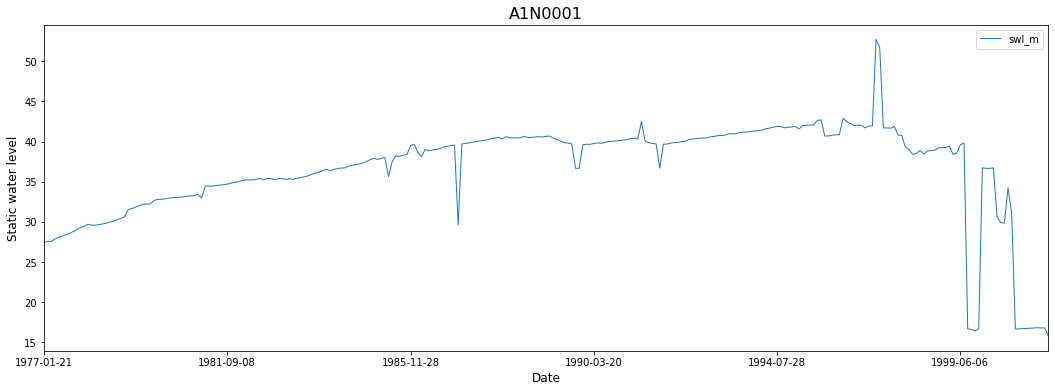

In [31]:
A1N0001.plot.line(x='swl_date', y = 'swl_m', figsize=(18,6), lw = 1)

plt.title('A1N0001', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Static water level', fontsize = 12);

In [32]:
print (A1N0001 ['swl_date'].min())
print (A1N0001 ['swl_date'].max())

1977-01-21
2011-09-27


In [33]:
A3N0015 = water_levels_RIMS [water_levels_RIMS ['bh_id'] == 'A3N0015']

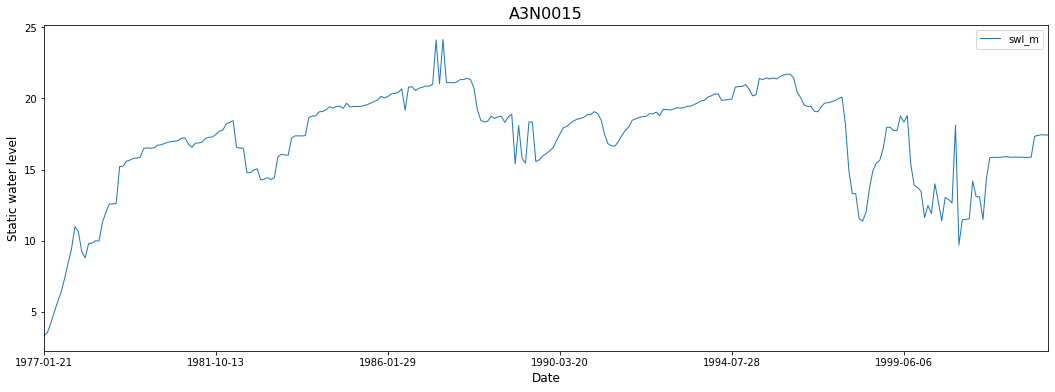

In [34]:
A3N0015.plot.line(x='swl_date', y = 'swl_m', figsize=(18,6), lw = 1)

plt.title('A3N0015', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Static water level', fontsize = 12);

In [35]:
print (A3N0015 ['swl_date'].min())
print (A3N0015 ['swl_date'].max())

1977-01-21
2005-01-15


In [36]:
A1N0003 = RIMS_water_levels [RIMS_water_levels ['bh_id'] == 'A1N0003']

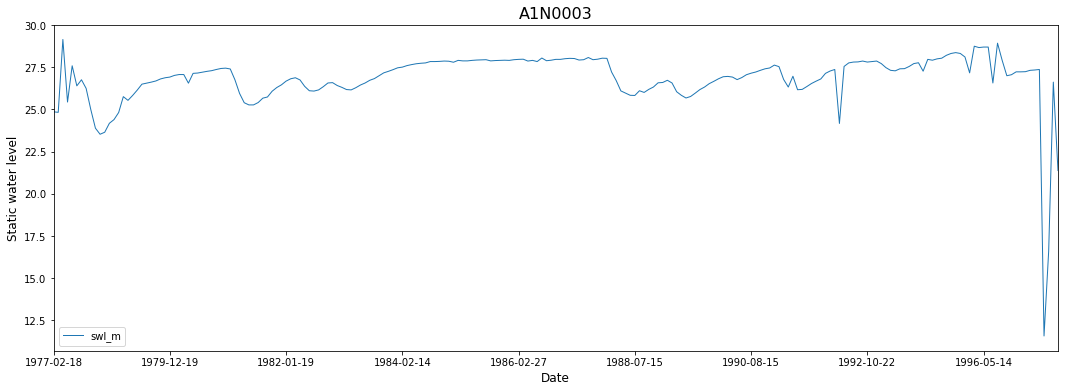

In [37]:
A1N0003.plot.line(x='swl_date', y = 'swl_m', figsize=(18,6), lw = 1)

plt.title('A1N0003', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Static water level', fontsize = 12);

In [38]:
print (A1N0003 ['swl_date'].min())
print (A1N0003 ['swl_date'].max())

1977-02-18
2000-06-30


## Reading in Ramotswa 1 and 2

In [39]:
ramotswa1 = pd.read_csv('Ramotswa data 1 20190904.csv', header = 0, encoding = 'unicode_escape')
ramotswa2 = pd.read_csv('Ramotswa data 2 20190904.csv', header = 0, encoding = 'unicode_escape')

### Assessing Ramotswa 1 and Ramotswa 2

In [40]:
ramotswa1.head(1)

,Monitoring Point ID,Monitoring Point Name,Latitude,Longitude,Located on Feature Name,Located on Type,Drainage Region Name,Feature Reference Code,Monitoring Active,Sample Start Date,...,pH-Diss-Water (PH) (pH units) Greater Than,pHs-Calc-Water (PH AT SATURATION WITH RESPECT TO CACO3) (null) Result,pHs-Calc-Water (PH AT SATURATION WITH RESPECT TO CACO3) (null) Detection Limit,pHs-Calc-Water (PH AT SATURATION WITH RESPECT TO CACO3) (null) Greater Than,NO2-N-Diss-Water (NITRITE NITROGEN) (mg/L) Result,NO2-N-Diss-Water (NITRITE NITROGEN) (mg/L) Detection Limit,NO2-N-Diss-Water (NITRITE NITROGEN) (mg/L) Greater Than,N-Tot-Calc-Water (TOTAL NITROGEN CALCULATED) (mg/L) Result,N-Tot-Calc-Water (TOTAL NITROGEN CALCULATED) (mg/L) Detection Limit,N-Tot-Calc-Water (TOTAL NITROGEN CALCULATED) (mg/L) Greater Than
0,84958,A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...,-25.193581,25.801222,NaN,NaN,A10B,NaN,No,1999-10-25,...,NaN,7.687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
ramotswa2.head(1)

,Monitoring Point ID,Monitoring Point Name,Latitude,Longitude,Located on Feature Name,Located on Type,Drainage Region Name,Feature Reference Code,Monitoring Active,Sample Start Date,...,O-Diss-Water (OXYGEN DISSOLVED) (mg/L) Greater Than,SOLIDS-Susp-Water (TOTAL SUSPENDED SOLIDS) (mg/L) Result,SOLIDS-Susp-Water (TOTAL SUSPENDED SOLIDS) (mg/L) Detection Limit,SOLIDS-Susp-Water (TOTAL SUSPENDED SOLIDS) (mg/L) Greater Than,TC-SuspMPN-Water (TOTAL COLIFORM COUNT BY MPN METHOD) (MPN/100mL) Result,TC-SuspMPN-Water (TOTAL COLIFORM COUNT BY MPN METHOD) (MPN/100mL) Detection Limit,TC-SuspMPN-Water (TOTAL COLIFORM COUNT BY MPN METHOD) (MPN/100mL) Greater Than,TEMP-Phys-Water (TEMPERATURE) (°C) Result,TEMP-Phys-Water (TEMPERATURE) (°C) Detection Limit,TEMP-Phys-Water (TEMPERATURE) (°C) Greater Than
0,84958,A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...,-25.193581,25.801222,NaN,NaN,A10B,NaN,No,2000-05-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning  Ramotswa 1 and Ramotswa 2

#### Issues listed with Ramotswa 1 and Ramotswa 2

- Extract variable result column
- Rename columns 
- Contact details from Andrew
- File names 
- Check units with RIMS
- Check names with RIMS
- Check water levels (negative sign, strip)
- Fill in quality description and datatrans: use code above to fill in

In [125]:
#r1.loc[:, r1.columns.str.contains('Result')]
#r_df1 = ramotswa1.iloc[:, np.r_[:19]]
#r_df2 = ramotswa1.loc[:, ramotswa1.columns.str.contains('Result')]
#r_df2_changed = r_df2.rename(columns = lambda x : str(x)[:15])
#r_df2.rename(columns = lambda x : str(x)[:-32])
#r_df2.rename(columns = lambda x : str(x)[:14])
#new_data = [r_df1, r_df2]
#ramotswa1_2_new = pd.concat(new_data, sort = False)

#### Cleaning Ramotswa 1

In [42]:
r1 = ramotswa1.copy()

In [43]:
r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Columns: 109 entries, Monitoring Point ID to N-Tot-Calc-Water (TOTAL NITROGEN CALCULATED) (mg/L) Greater Than
dtypes: float64(99), int64(1), object(9)
memory usage: 1.7+ MB


In [44]:
for i, v in enumerate (r1.columns):
    print (i, v)

0 Monitoring Point ID
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Result
20 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Detection Limit
21 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Greater Than
22 CORR-Diss-Water (CORROSIVITY INDEX) (null) Result
23 CORR-Diss-Water (CORROSIVITY INDEX) (null) Detection Limit
24 CORR-Diss-Water (CORROSIVITY INDEX) (null) Greater Than
25 Ca-Diss-Water (CALCIUM) (mg/L) Result
26 Ca-Diss-Water (CALCIUM) (mg/L) Detection Limit
27 Ca-Diss-Water (CALCIUM) (mg/L) Greater Than
28 Cl-Diss-Water (CHLORIDE) (mg/L) Result
29 Cl-Diss-Water (CHLORIDE) (mg/L) Detection Limit
30 Cl-Di

In [45]:
filtered_r1 = r1.iloc[:, np.r_[:19, 19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97,100,103,106]]
filtered_r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 49 columns):
Monitoring Point ID                                                       2041 non-null int64
Monitoring Point Name                                                     2041 non-null object
Latitude                                                                  2041 non-null float64
Longitude                                                                 2041 non-null float64
Located on Feature Name                                                   1988 non-null object
Located on Type                                                           1988 non-null object
Drainage Region Name                                                      2041 non-null object
Feature Reference Code                                                    0 non-null float64
Monitoring Active                                                         2041 non-null object
Sample Start Date                      

In [46]:
filtered_r1.rename(columns = {'Monitoring Point ID': 'ID Monitoring Point'}, inplace = True)

In [47]:
for i, v in enumerate (filtered_r1.columns):
    print (i,v)

0 ID Monitoring Point
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Result
20 CORR-Diss-Water (CORROSIVITY INDEX) (null) Result
21 Ca-Diss-Water (CALCIUM) (mg/L) Result
22 Cl-Diss-Water (CHLORIDE) (mg/L) Result
23 DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result
24 EC-Phys-Water (ELECTRICAL CONDUCTIVITY) (mS/m) Result
25 F-Diss-Water (FLUORIDE) (mg/L) Result
26 HARD-Mg-Calc-Water (HARDNESS MAGNESIUM CALCULATED) (mg/L) Result
27 HARD-Tot-Water (HARDNESS AS CACO3 CALCULATED) (mg/L) Result
28 K-Diss-Water (POTASSIUM) (mg/L) Result
29 KJEL N-Tot-Water (KJELDAHL NITROGEN) (mg/L) Result
30 LANGL-Index-Water (LANGLIER INDEX) (null) Res

In [48]:
filtered_r1.rename(columns = lambda x : str(x)[:15], inplace = True)

filtered_r1.rename(columns = {
    
'ID Monitoring P': 'Monitoring Point ID', 'Monitoring Poin': 'Monitoring Point Name',
'Located on Feat': 'Located on Feature Name', 'Drainage Region': 'Drainage Region Name',
'Feature Referen': 'Feature Reference Code', 'Monitoring Acti': 'Monitoring Active',
'Sample Start Da':'Sample Start Date', 'Sample Start Ti':'Sample Start Time', 'Sample Start De':'Sample Start Depth',
'ASAR-Diss-Water': 'ASAR', 'CORR-Diss-Water': 'CORR', 'Ca-Diss-Water (': 'Ca',
'Cl-Diss-Water (': 'Cl', 'DMS-Tot-Water (': 'DMS', 'EC-Phys-Water (': 'EC',
'F-Diss-Water (F': 'F', 'HARD-Mg-Calc-Wa': 'HARD-Mg-Calc', 'HARD-Tot-Water': 'HARD-Tot',
'K-Diss-Water (P': 'K', 'KJEL N-Tot-Wate': 'KJEL N-Tot', 'LANGL-Index-Wat': 'LANGL-Index',
'Mg-Diss-Water (': 'Mg', 'NH3(25)-Union-D': 'NH3(25)-Union', 'NH4-N-Diss-Wate': 'NH4-N',
'NO3+NO2-N-Diss-': 'NO3+NO2-N', 'Na-Diss-Water (': 'Na', 'P-Tot-Water (TO': 'P-Tot', 'PO4-P-Diss-Wate': 'PO4-P',
'RYZNAR-Index-Wa': 'RYZNAR-Index', 'SAR-Diss-Water ':  'SAR', 'SO4-Diss-Water ':  'SO4', 'Si-Diss-Water (': 'Si',
'TAL-Diss-Water ':  'TAL', 'pH-Diss-Water (': 'pH', 'pHs-Calc-Water ': 'pHs-Calc',
'NO2-N-Diss-Wate': 'NO2-N', 'N-Tot-Calc-Wate': 'N-Tot-Calc'  

}, inplace = True)

filtered_r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 49 columns):
Monitoring Point ID        2041 non-null int64
Monitoring Point Name      2041 non-null object
Latitude                   2041 non-null float64
Longitude                  2041 non-null float64
Located on Feature Name    1988 non-null object
Located on Type            1988 non-null object
Drainage Region Name       2041 non-null object
Feature Reference Code     0 non-null float64
Monitoring Active          2041 non-null object
Sample Start Date          2041 non-null object
Sample Start Time          2041 non-null object
Sample End Date            0 non-null float64
Sample End Time            0 non-null float64
Time Interval              419 non-null float64
Sample Start Depth         1629 non-null float64
Sample End Dept            0 non-null float64
Depth Interval             0 non-null float64
Preservative               2041 non-null object
Action Type                2041 non-n

In [49]:
# Insert data source details i.e. data owner, contact, email and file name
filtered_r1 ['dataowner'] = "Department of Water and Sanitation South Africa"
filtered_r1 ['contact_person'] = "Ramusiya, Fhedzisani"
filtered_r1 ['email'] = "RamusiyaF@dws.gov.za"
filtered_r1 ['file_name'] = "Ramotswa data 1 20190904.csv"

In [50]:
filtered_r1.head(2)

,Monitoring Point ID,Monitoring Point Name,Latitude,Longitude,Located on Feature Name,Located on Type,Drainage Region Name,Feature Reference Code,Monitoring Active,Sample Start Date,...,Si,TAL,pH,pHs-Calc,NO2-N,N-Tot-Calc,dataowner,contact_person,email,file_name
0,84958,A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...,-25.193581,25.801222,NaN,NaN,A10B,NaN,No,1999-10-25,...,6.226,115.446,7.788,7.687,NaN,NaN,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,Ramotswa data 1 20190904.csv
1,84958,A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...,-25.193581,25.801222,NaN,NaN,A10B,NaN,No,1999-11-16,...,5.637,108.982,7.932,7.939,NaN,NaN,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,Ramotswa data 1 20190904.csv


#### Cleaning Ramotswa 2

In [51]:
r2 = ramotswa2.copy()

In [52]:
for i, v in enumerate (r2.columns):
    print (i, v)

0 Monitoring Point ID
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 Al-Diss-Water (ALUMINIUM) (mg/L) Result
20 Al-Diss-Water (ALUMINIUM) (mg/L) Detection Limit
21 Al-Diss-Water (ALUMINIUM) (mg/L) Greater Than
22 As-Diss-Water (ARSENIC) (mg/L) Result
23 As-Diss-Water (ARSENIC) (mg/L) Detection Limit
24 As-Diss-Water (ARSENIC) (mg/L) Greater Than
25 B-Diss-Water (BORON) (mg/L) Result
26 B-Diss-Water (BORON) (mg/L) Detection Limit
27 B-Diss-Water (BORON) (mg/L) Greater Than
28 Ba-Diss-Water (BARIUM) (mg/L) Result
29 Ba-Diss-Water (BARIUM) (mg/L) Detection Limit
30 Ba-Diss-Water (BARIUM) (mg/L) Greater Than
31 COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result
32 COD (CHEMICAL OXYGEN DEMAND) (mg/L) D

In [53]:
filtered_r2 = r2.iloc[:, np.r_[:19, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91]]
filtered_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 44 columns):
Monitoring Point ID                                                                   630 non-null int64
Monitoring Point Name                                                                 630 non-null object
Latitude                                                                              630 non-null float64
Longitude                                                                             630 non-null float64
Located on Feature Name                                                               615 non-null object
Located on Type                                                                       615 non-null object
Drainage Region Name                                                                  630 non-null object
Feature Reference Code                                                                0 non-null float64
Monitoring Active                              

In [54]:
filtered_r2.columns

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Depth',
       'Depth Interval', 'Preservative', 'Action Type',
       'Al-Diss-Water (ALUMINIUM) (mg/L) Result',
       'As-Diss-Water (ARSENIC) (mg/L) Result',
       'B-Diss-Water (BORON) (mg/L) Result',
       'Ba-Diss-Water (BARIUM) (mg/L) Result',
       'COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result',
       'Cd-Diss-Water (CADMIUM) (mg/L) Result',
       'Cr-Diss-Water (CHROMIUM) (mg/L) Result',
       'Cu-Diss-Water (COPPER) (mg/L) Result',
       'Fe-Diss-Water (IRON) (mg/L) Result',
       'Mn-Diss-Water (MANGANESE) (mg/L) Result',
       'Mo-Diss-Water (MOLYBDENUM) (mg/L) Result',
       'Ni-Diss-Water (NICKEL) (mg/L) Result',


In [55]:
filtered_r2.rename(columns = {'Monitoring Point ID': 'ID Monitoring Point'}, inplace = True)

In [56]:
for i, v in enumerate (filtered_r2.columns):
    print(i, v)

0 ID Monitoring Point
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 Al-Diss-Water (ALUMINIUM) (mg/L) Result
20 As-Diss-Water (ARSENIC) (mg/L) Result
21 B-Diss-Water (BORON) (mg/L) Result
22 Ba-Diss-Water (BARIUM) (mg/L) Result
23 COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result
24 Cd-Diss-Water (CADMIUM) (mg/L) Result
25 Cr-Diss-Water (CHROMIUM) (mg/L) Result
26 Cu-Diss-Water (COPPER) (mg/L) Result
27 Fe-Diss-Water (IRON) (mg/L) Result
28 Mn-Diss-Water (MANGANESE) (mg/L) Result
29 Mo-Diss-Water (MOLYBDENUM) (mg/L) Result
30 Ni-Diss-Water (NICKEL) (mg/L) Result
31 Pb-Diss-Water (LEAD) (mg/L) Result
32 Sr-Diss-Water (STRONTIUM) (mg/L) Result
33 V-Diss-Water (VANADIUM) (mg/L) Result
34 Zn-Diss-Wat

In [57]:
filtered_r2.rename(columns = lambda x : str(x)[:15], inplace = True)

filtered_r2.rename(columns = {
    
'ID Monitoring P': 'Monitoring Point ID', 'Monitoring Poin': 'Monitoring Point Name',
'Located on Feat': 'Located on Feature Name', 'Drainage Region': 'Drainage Region Name',
'Feature Referen': 'Feature Reference Code', 'Monitoring Acti': 'Monitoring Active',
'Sample Start Da':'Sample Start Date', 'Sample Start Ti':'Sample Start Time', 'Sample Start De':'Sample Start Depth',
'Al-Diss-Water (': 'Al', 'As-Diss-Water (': 'As', 'B-Diss-Water (B': 'B', 'Ba-Diss-Water (': 'Ba', 'COD (CHEMICAL O': 'COD',
'Cd-Diss-Water (': 'Cd', 'Cr-Diss-Water (': 'Cr', 'Cu-Diss-Water (': 'Cu', 'Fe-Diss-Water (': 'Fe', 'Mn-Diss-Water (': 'Mn', 
'Mo-Diss-Water (': 'Mo', 'Ni-Diss-Water (': 'Ni', 'Pb-Diss-Water (': 'Pb', 'Sr-Diss-Water (': 'Sr', 'V-Diss-Water (V': 'V',
'Zn-Diss-Water (': 'Zn', 'E.COLI-Susp-Wat': 'E.COLI-Susp', 'E.COLI-SuspMPN-': 'E.COLI-SuspMPN', 'Eh-Phys-Water (': 'Eh-Phys',
'Hydrogen-3-Wate': 'Hydrogen-3', 'O-Abs-Water (OX': 'O-Ab', 'O-Diss-Water (O': 'O', 'SOLIDS-Susp-Wat': 'SOLIDS-Susp',
'TC-SuspMPN-Wate': 'TC-SuspMPN', 'TEMP-Phys-Water': 'TEMP-Phy'

}, inplace = True)

In [58]:
filtered_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 44 columns):
Monitoring Point ID        630 non-null int64
Monitoring Point Name      630 non-null object
Latitude                   630 non-null float64
Longitude                  630 non-null float64
Located on Feature Name    615 non-null object
Located on Type            615 non-null object
Drainage Region Name       630 non-null object
Feature Reference Code     0 non-null float64
Monitoring Active          630 non-null object
Sample Start Date          543 non-null object
Sample Start Time          543 non-null object
Sample End Date            0 non-null float64
Sample End Time            0 non-null float64
Time Interval              0 non-null float64
Sample Start Depth         445 non-null float64
Sample End Dept            0 non-null float64
Depth Interval             0 non-null float64
Preservative               513 non-null object
Action Type                543 non-null object
Al    

In [59]:
# Insert data source details i.e. data owner, contact, email and file name
filtered_r2 ['dataowner'] = "Department of Water and Sanitation South Africa"
filtered_r2 ['contact_person'] = "Ramusiya, Fhedzisani"
filtered_r2 ['email'] = "RamusiyaF@dws.gov.za"
filtered_r2 ['file_name'] = "Ramotswa data 2 20190904.csv"

In [60]:
filtered_r2.head(2)

,Monitoring Point ID,Monitoring Point Name,Latitude,Longitude,Located on Feature Name,Located on Type,Drainage Region Name,Feature Reference Code,Monitoring Active,Sample Start Date,...,Hydrogen-3,O-Ab,O,SOLIDS-Susp,TC-SuspMPN,TEMP-Phy,dataowner,contact_person,email,file_name
0,84958,A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...,-25.193581,25.801222,NaN,NaN,A10B,NaN,No,2000-05-30,...,NaN,NaN,NaN,NaN,NaN,NaN,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,Ramotswa data 2 20190904.csv
1,84961,2525DB00395 TWEEFONTEIN UPPER (A1G003) - WR70,-25.545400,25.940800,2525DB00395 TWEEFONTEIN UPPER (A1H003) - WR70,Spring/Eye,A10A,NaN,No,2007-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,Ramotswa data 2 20190904.csv


In [61]:
# use this merge for ramotswa 1 and 2
# ramotswa_merged = pd.merge (ramotswa1, ramotswa2, on = "Monitor.ing Point ID", how = "inner", copy = False)

Ramotswa variables inventory 20190904.csv

SITE_INFORA10A.csv

A1H001 Upper Eye Dinokana.xlsx
A1H002 Lower Eye Dinokana.xlsx
A1H003 Upper Eye Tweefontein.xlsx
A1H004 Lower Eye Tweefontein.xlsx
A1H005 Skilpad Eye.xlsx

Ramotswa study area plus 10km.xlsx

## Reading in ramotswa_inventory

In [62]:
ramotswa_inventory = pd.read_csv('Ramotswa variables inventory 20190904.csv', header = 0, encoding = 'unicode_escape')
ramotswa_inventory.head(2)

,Monitoring Point ID,Monitoring Point Name,Latitude,Longitude,Located on Feature Name,Located on Type,Drainage Region Name,Feature Reference Code,Monitoring Active,Monitoring Variable,Measuring Unit,Number of Analyses,First Analyses,Last Analyses
0,101022,TWEEFONTEIN (DUP NAME 6700),-25.541667,25.95,NaN,NaN,A10A,NaN,No,ASAR-Diss-Water,NaN,1,1990-05-15,1990-05-15
1,101022,TWEEFONTEIN (DUP NAME 6700),-25.541667,25.95,NaN,NaN,A10A,NaN,No,CORR-Diss-Water,NaN,1,1990-05-15,1990-05-15


### Assessing ramotswa_inventory

In [63]:
ramotswa_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 14 columns):
Monitoring Point ID        3299 non-null int64
Monitoring Point Name      3299 non-null object
Latitude                   3299 non-null float64
Longitude                  3299 non-null float64
Located on Feature Name    2924 non-null object
Located on Type            2924 non-null object
Drainage Region Name       3299 non-null object
Feature Reference Code     0 non-null float64
Monitoring Active          3299 non-null object
Monitoring Variable        3299 non-null object
Measuring Unit             2517 non-null object
Number of Analyses         3299 non-null int64
First Analyses             3299 non-null object
Last Analyses              3299 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 361.0+ KB


In [64]:
ramotswa_inventory ['Monitoring Point ID'].unique()

array([    101022,     101553, 1000004210,      95419,     150694,
           150695,     150696,     150702,     150703,     150704,
           150705, 1000260782,     189482,      84961,      84962,
            88622,      88626,     101555,     101556,     101764,
           101765,     101766,     101767,     101768,      84958,
           100306,     174644,      90075,      90076,      99815,
            99816,      95416,      95417,     150717,     150725,
           150739,     150740,     150741,     150742,     150743,
           150748,     150749,     150750,     150751,     150786,
           150796,     150797,     166760,     166827,     166901,
           166915, 1000259988,     193665,      90300,      90302,
            88621,      88627,      99819,     100311,     100312,
           100313, 1000260071,      89822,      89892,      95418,
            95448,      97094,      97095,     150697,     150698,
           150699,     150706,     150707,     150708,     150

In [65]:
ramotswa_inventory ['Monitoring Point ID'].value_counts()

89822     44
101556    42
90109     42
90075     42
101764    42
          ..
90299     14
193665    11
194658     9
194668     9
194670     7
Name: Monitoring Point ID, Length: 126, dtype: int64

In [66]:
print(ramotswa_inventory ['Measuring Unit'].unique())
print(ramotswa_inventory ['Measuring Unit'].nunique())

[nan 'mg/L' 'mS/m' 'pH units' '°C' 'cfu/100mL' 'MPN/100mL' 'mV' 'TU']
8


In [67]:
print(ramotswa_inventory ['Monitoring Variable'].unique())
print(ramotswa_inventory ['Monitoring Variable'].nunique())

['ASAR-Diss-Water' 'CORR-Diss-Water' 'Ca-Diss-Water' 'Cl-Diss-Water'
 'DMS-Tot-Water' 'EC-Phys-Water' 'F-Diss-Water' 'HARD-Mg-Calc-Water'
 'HARD-Tot-Water' 'K-Diss-Water' 'LANGL-Index-Water' 'Mg-Diss-Water'
 'NH3(25)-Union-Diss-W' 'NH4-N-Diss-Water' 'NO3+NO2-N-Diss-Water'
 'Na-Diss-Water' 'PO4-P-Diss-Water' 'RYZNAR-Index-Water' 'SAR-Diss-Water'
 'SO4-Diss-Water' 'Si-Diss-Water' 'TAL-Diss-Water' 'pH-Diss-Water'
 'pHs-Calc-Water' 'TEMP-Phys-Water' 'Al-Diss-Water' 'As-Diss-Water'
 'B-Diss-Water' 'Ba-Diss-Water' 'Cd-Diss-Water' 'Cr-Diss-Water'
 'Cu-Diss-Water' 'Fe-Diss-Water' 'Mn-Diss-Water' 'Mo-Diss-Water'
 'Ni-Diss-Water' 'Pb-Diss-Water' 'SO4Ion/MajAnions-Wat'
 'SO4Ion/TotAnions-Wat' 'Sr-Diss-Water' 'V-Diss-Water' 'Zn-Diss-Water'
 'COD' 'E.COLI-Susp-Water' 'NO2-N-Diss-Water' 'O-Abs-Water'
 'SOLIDS-Susp-Water' 'TC-SuspMPN-Water' 'KJEL N-Tot-Water'
 'N-Tot-Calc-Water' 'P-Tot-Water' 'Eh-Phys-Water' 'Hydrogen-3-Water'
 'O-Diss-Water' 'E.COLI-SuspMPN-Water']
55


### Cleaning ramotswa_inventory

- Missing values for Located on Feature Name, Located on Type and Measuring Unit.
- Columns Feature Reference Code has no data
- Units of measurements

#### Issues listed with ramotswa_inventory

## site_info_10A

In [42]:
#basic information of sites, rename and lower case

site_info_10A = pd.read_csv ('SITE_INFORA10A.csv')
site_info_10A.rename(columns = lambda x: x.strip().lower(), inplace = True)
site_info_10A.rename({'#station': 'station'}, axis = 1, inplace = True)

site_info_10A.head(1)

,station,stname,shortname,mapname,zone,easting,northing,grdatum,latitude,longitude,...,water quality monitoring,monitoring frequency,old wma,water supply system,department number,district municipality,local municipality,groundwater consumer,weather bureau station,wms identifier
0,A1N0001,Tweefontein,BOMOLOPO,NaN,0,0,0,Unknown,-25.549722,25.9275,...,Unknown,Quarterly Monitoring,Crocodile (West) and Marico,(None),Unknown,Ngaka Modiri Molema,Ramotshere Moiloa,Unknown,Unknown,Unknown


### Assessing site_info_10A

In [466]:
site_info_10A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 50 columns):
station                                              16 non-null object
stname                                               16 non-null object
shortname                                            12 non-null object
mapname                                              8 non-null object
zone                                                 16 non-null int64
easting                                              16 non-null int64
northing                                             16 non-null int64
grdatum                                              16 non-null object
latitude                                             16 non-null float64
longitude                                            16 non-null float64
lldatum                                              16 non-null object
posacc                                               16 non-null object
elev                               

In [472]:
site_info_10A ['station'].unique()

array(['A1N0001', 'A1N0002', 'A1N0003', 'A3H012', 'A3N0015', 'A3N0513',
       'A3N0514', 'A3N0516', 'A3N0519', 'A3N0521', 'D4N1468', 'D4N1658',
       'D4N1666', 'D4N2515', 'D4N2516', 'D4N2517'], dtype=object)

### cleaning site_info_10A

- Fill blanks, fill NaN
- Replace (None) under water supply systems

## Reading in excel files

In [68]:
files2 = ['A1H001 Upper Eye Dinokana.xlsx', 'A1H002 Lower Eye Dinokana.xlsx', 'A1H003 Upper Eye Tweefontein.xlsx',
          'A1H004 Lower Eye Tweefontein.xlsx', 'A1H005 Skilpad Eye.xlsx']

In [69]:
A1 = pd.DataFrame()

In [70]:
for f in files2:
    df = pd.read_excel(f, header = None, parse_dates = True)
    df ["name"] = df.iloc[0,1][0:6] # gets the name from the the position located in the excel file, creates a new column and 
                                    # fills in the name of the site
    df = df.iloc[4:, :]
    df.columns = ["date", "mean_discharge_cumecs", "qual", "name"]
    A1 = A1.append(df, ignore_index = True)

A1.head()

,date,mean_discharge_cumecs,qual,name
0,1960-05-10 00:00:00,NaN,255,A1H001
1,1960-05-11 00:00:00,0.095,26,A1H001
2,1960-05-12 00:00:00,0.095,26,A1H001
3,1960-05-13 00:00:00,0.095,26,A1H001
4,1960-05-14 00:00:00,0.095,26,A1H001


### Assessing excel files

In [72]:
A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68384 entries, 0 to 68383
Data columns (total 4 columns):
date                     68384 non-null object
mean_discharge_cumecs    62927 non-null object
qual                     68384 non-null object
name                     68384 non-null object
dtypes: object(4)
memory usage: 2.1+ MB


In [93]:
print (A1 ['date'].sort_values())

0       1960-05-10
21210   1960-05-10
21211   1960-05-11
1       1960-05-11
21212   1960-05-12
           ...    
21205   2018-05-31
21206   2018-06-01
21207   2018-06-02
21208   2018-06-03
21209   2018-06-04
Name: date, Length: 68384, dtype: datetime64[ns]


In [89]:
print (A1 ['date'].sort_values().min())
print (A1 ['date'].sort_values().max())

1960-05-10 00:00:00
2018-06-04 00:00:00


In [78]:
A1 ['mean_discharge_cumecs'].value_counts() 

0.004    2709
0.000    2462
0.001    1939
0.003    1926
0.011    1901
         ... 
0.263       1
0.308       1
0.290       1
0.327       1
0.272       1
Name: mean_discharge_cumecs, Length: 271, dtype: int64

In [73]:
A1 ['qual'].unique()

array([255, 26, 170, 1, 64, 2, 151, 47, 44, 60], dtype=object)

In [74]:
A1 ['name'].unique()

array(['A1H001', 'A1H002', 'A1H003', 'A1H004', 'A1H005'], dtype=object)

### Cleaning excel files

- mean_discahrge_cumecs has missing data 
- Change qual number to number description
- Fix date column
- Convert discharge estimates to appropriate units?
- No Coordinates 

In [115]:
A1_clean = A1.copy()

In [116]:
A1_clean ['quality_desc'] = A1_clean ['qual'].map({
    
255: 'Missing data', 26: 'Audited Gauge Plate Readings / dip level readings',
170: 'Period of No Record (PNR)', 1: 'Good continuous data', 64: 'Audited Estimate',
2: 'Good edited data', 151: 'Data Missing', 47: 'Edited and checked\044 still unaudited',
44: 'Checked\044 still unaudited', 60: 'Above Rating'   
    
})
A1_clean.head(2)

,date,mean_discharge_cumecs,qual,name,quality_desc
0,1960-05-10 00:00:00,NaN,255,A1H001,Missing data
1,1960-05-11 00:00:00,0.095,26,A1H001,Audited Gauge Plate Readings / dip level readings


In [117]:
A1_clean ['quality_desc'].unique()

array(['Missing data',
       'Audited Gauge Plate Readings / dip level readings',
       'Period of No Record (PNR)', 'Good continuous data',
       'Audited Estimate', 'Good edited data', 'Data Missing',
       'Edited and checked$ still unaudited', 'Checked$ still unaudited',
       'Above Rating'], dtype=object)

In [118]:
# Insert data source details i.e. data owner, contact, email and file name
A1_clean ['dataowner'] = "Department of Water and Sanitation South Africa"
A1_clean ['contact_person'] = "Ramusiya, Fhedzisani"
A1_clean ['email'] = "RamusiyaF@dws.gov.za"
A1_clean.loc[A1['name'].str.contains('A1H001'), 'file_name'] = 'A1H001 Upper Eye Dinokana.xlsx'
A1_clean.loc[A1['name'].str.contains('A1H002'), 'file_name'] = 'A1H002 Lower Eye Dinokana.xlsx'
A1_clean.loc[A1['name'].str.contains('A1H003'), 'file_name'] = 'A1H003 Upper Eye Tweefontein.xlsx'
A1_clean.loc[A1['name'].str.contains('A1H004'), 'file_name'] = 'A1H004 Lower Eye Tweefontein.xlsx'
A1_clean.loc[A1['name'].str.contains('A1H005'), 'file_name'] = 'A1H005 Skilpad Eye.xlsx'
A1_clean.head(2)

,date,mean_discharge_cumecs,qual,name,quality_desc,dataowner,contact_person,email,file_name
0,1960-05-10 00:00:00,NaN,255,A1H001,Missing data,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx
1,1960-05-11 00:00:00,0.095,26,A1H001,Audited Gauge Plate Readings / dip level readings,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx


In [119]:
A1_clean ['date'] = pd.to_datetime(A1_clean ['date'])

# Conver OnDate to RIMS requred date format in new column = date_rims
A1_clean ['date'] = A1_clean ['date'].dt.strftime('%Y-%m-%d')

A1_clean.head(2)

,date,mean_discharge_cumecs,qual,name,quality_desc,dataowner,contact_person,email,file_name
0,1960-05-10,NaN,255,A1H001,Missing data,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx
1,1960-05-11,0.095,26,A1H001,Audited Gauge Plate Readings / dip level readings,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx


In [120]:
# Fill missing values with np.nan
A1_clean = A1_clean.replace(np.nan,'9999')
A1_clean[A1_clean ['mean_discharge_cumecs'] == '9999'][:3]

,date,mean_discharge_cumecs,qual,name,quality_desc,dataowner,contact_person,email,file_name
0,1960-05-10,9999,255,A1H001,Missing data,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx
3180,1969-01-23,9999,170,A1H001,Period of No Record (PNR),Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx
3181,1969-01-24,9999,170,A1H001,Period of No Record (PNR),Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx


## Reading in Ramotswa study area plus 10km

In [122]:
#Quality_Code_Description = pd.read_excel ('Quality Code Description.xlsx', header = 0)
Ramotswa_study_area_plus_10km = pd.read_excel ('Ramotswa study area plus 10km.xlsx', header = 0)
Ramotswa_study_area_plus_10km.head(2)

,FEAT_ID,DESCRIPTIO,LOC_TYPE,LOC_NAME,QAT_WMS,MON_IND,N,FIRSTDATE,LASTDATE,STATION,...,WMANUM,WMANAME,WMA2NUM,WMA2NAME,PR,PR_name,PR_type,SQ4HASH,VegterID,VegterNM
0,101764,Moilos 37 JO on Dinokana Upper Eye at Dinokana...,Spring/Eye,DINOKANA UPPER EYE AT DINOKANA (AT PUMP STATIO...,A10A,1,192,1971-09-26,2018-05-30,A1H001,...,3,Crocodile (West) and Marico,1,Limpopo,NW,North West,Province,915,9,Western Bankeveld and Marico Bushveld
1,90309,Paardenvallei 67 JO on Malmanieloop Lower Eye,Spring/Eye,A3H022Q01 MALMANIELOOP AT PAARDENVALLEI,A31D,1,135,1979-12-19,2018-05-30,A3H022,...,3,Crocodile (West) and Marico,1,Limpopo,NW,North West,Province,964,10,Karst Belt


### Assessing Ramotswa study area plus 10km

In [123]:
Ramotswa_study_area_plus_10km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 42 columns):
FEAT_ID       126 non-null int64
DESCRIPTIO    126 non-null object
LOC_TYPE      126 non-null object
LOC_NAME      112 non-null object
QAT_WMS       126 non-null object
MON_IND       126 non-null int64
N             126 non-null int64
FIRSTDATE     126 non-null object
LASTDATE      126 non-null object
STATION       35 non-null object
QUATERNARY    126 non-null object
CATID         126 non-null int64
CMAP          126 non-null float64
MAR           126 non-null float64
CURVE         126 non-null int64
HYDROZ        125 non-null object
MAR4Q         126 non-null float64
TERTIARY      126 non-null object
TERT_ID       126 non-null int64
MAR3Q         126 non-null float64
SCND_ID       126 non-null int64
SECONDARY     126 non-null object
MAR2Q         126 non-null float64
PRIM_ID       126 non-null int64
PRIMARY       126 non-null object
MAR1Q         126 non-null float64
QUAT_CODE     

In [124]:
Ramotswa_study_area_plus_10km ['STATION'].unique()

array(['A1H001', 'A3H022', 'A3H021', 'A1H002Q01', 'A1H005Q01',
       'A3H015Q01', 'A1H003Q01', 'A1H004Q01', nan, 'A3R005', 'A3H011Q01',
       'A3H013Q01', 'ZQMZRS1', 'ZQMMLO1', 'ZQMLRE2', 'A1E001',
       'A3NGOT-PUANE', 'ZQMLRE3', '2526CA00750', '2525BD00199',
       '2525BD00198', 'A3KARE-GHOLF', '2624DB00233', '2525BC00074',
       '2525BC00075', '2525DB00395', '2525DB00394', '2525DB00363',
       '2525DB00369', 'ZQMBM40', 'ZQMBM41', 'ZQMBM45', 'ZQMBM46',
       'ZQMBM15', 'A3H012Q01', '2526CA00749'], dtype=object)

### Cleaning Ramotswa study area plus 10km